<a href="https://colab.research.google.com/github/cavs1010/calssification_tf/blob/main/Classification_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 2
Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.


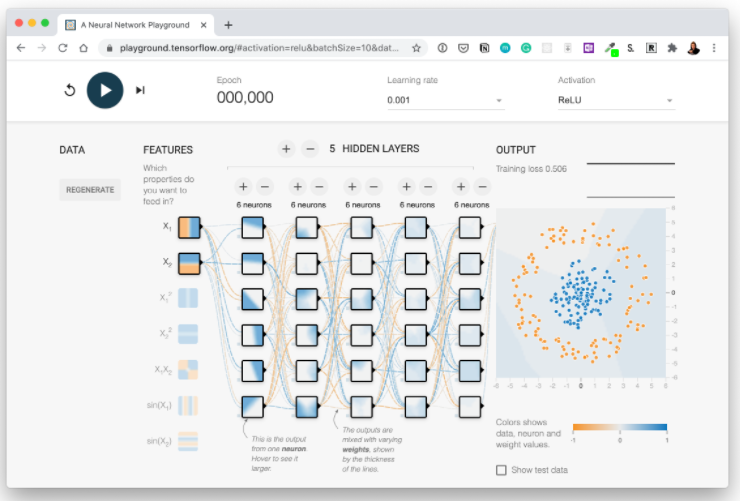

The link of the previos model is [link](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true)

In [ ]:
# Downloading the data
!pip install playground-data

  Created wheel for playground-data: filename=playground_data-1.1.1-py2.py3-none-any.whl size=20798 sha256=044ac20a43c9eece39b3b6f74a2df87ccd210699f718342ae1bd06a2f8a4cc9f
  Stored in directory: /root/.cache/pip/wheels/0a/83/26/9701478cd2f31df42fcc7d2cf0fa3fd6ff23cf8e44346166f3
Successfully built playground-data


In [ ]:
# Library required for importing the data
import plygdata as pg

# Extra libraries required
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [ ]:
# Data Generation
data_noise = 0.0
validation_data_ratio = 0.2

data_array = pg.generate_data(pg.DatasetType.ClassifyCircleData, data_noise)
X_train, y_train, X_val, y_val = pg.split_data(data_array, validation_size=validation_data_ratio)

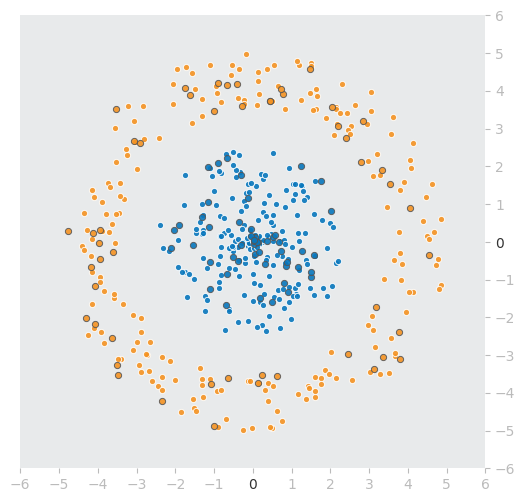

In [ ]:
# Plot the data on the standard graph for Playground
fig, ax = pg.plot_points_with_playground_style(X_train, y_train, X_valid, y_valid, figsize = (6, 6), dpi = 100)

🧠For creating the model, the next characteristics must be satisfied:
* 5 hiden layers
* 6 neurons in each layer
* Learning rate = 0.001
* Activation Function = ReLu
* Because it is a binary classifier, the output layer shape is 1
* Adam optimizer
* Accuracy metric



In [ ]:
# Transform the y_train and y_val into binary variables
y_train, y_val = y_train.astype(int), y_val.astype(int)
y_train, y_val = np.where(y_train == 1, 1, 0), np.where(y_val == 1, 1, 0)

In [ ]:
# set the random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.Input(shape=(2)),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(6, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

# 3. Fith the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, verbose=0)

In [ ]:
# Let's visualize
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value (We're going to make predictions)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0])>1:
    print('doing multiclass classification')
    #We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmas(y_pred, axis=1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  #  Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classification


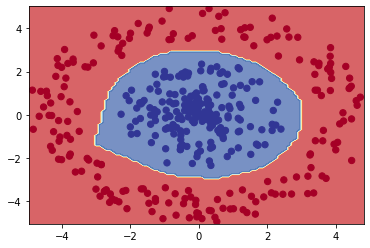

In [ ]:
plot_decision_boundary(model, X_train, y_train)

The model has been replicated!

### Exercise 3
Create a classification dataset using Scikit-Learn's `make_moons()` function, visualize it and then build a model to fit it at over 85% accuracy.

In [ ]:
# 1. Import dataset
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=500)

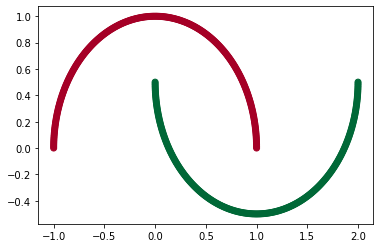

In [ ]:
# 2. Visualize data
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlGn)

In [ ]:
# 3. Split train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# 4. Model TRaining
# INITIAL MODEL
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([tf.keras.Input(shape=2),
                             tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(5, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model_1_history = model_1.fit(X_train, y_train, 
                              validation_data=(X_test, y_test),
                              epochs=100)

doing binary classification


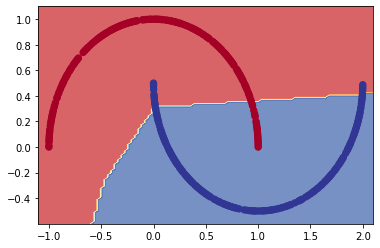

In [ ]:
# 5. Let's visualize the prediction boundaries
plot_decision_boundary(model_1, X_train, y_train)

### Exercise 4
Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [1]:
# Required Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has been already sorted into train and test set
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
# Create a small list so we can index onto our training labels, so it's human-readible
class_names = ["T-shirt/top", "Trouser/pants", "Pullover shirt", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
 # Function for creating a nice confusion matrix
# Create a confusion matrix
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10,10), text_size=15):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_norm = cm.astype('float')/ cm.sum(axis=1)[:, np.newaxis] # Normalize confusion matrix
  n_classes = cm.shape[0]

  # Let's pretify
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title='Confusion Matrix',
        xlabel='Predicted Label',
        ylabel='True Label',
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  # Set x-axis labels to the bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # ADjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min())/2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]}({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]> threshold else 'black',
            size=text_size)

#### Data preparation

In [3]:
# Normalizing the data
train_data, test_data = train_data/255, test_data/255

#### Model 1
 * 2 Hidden layers with 4 neurons each one
 * Activation function of the hiden layers is `relu`
 * Optimizer is Adam
 * Epochs = 100
 * Learning rate is 0.001

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(4, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation='softmax')])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data, train_labels,
                        epochs=10,
                        validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

 #### Model_2
 
 To improve the model, I will modify the old model with the next stages:
* Add three hidden layers.
* Increase to five the number of neuron in each hidden layer.
* Run the model for 20 epochs. 

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data, train_labels,
                        epochs=20,
                        validation_data = (test_data, test_labels))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.1189 - accuracy: 0.5882 - val_loss: 0.7637 - val_accuracy: 0.7272
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7058 - accuracy: 0.7503 - val_loss: 0.6580 - val_accuracy: 0.7679
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6280 - accuracy: 0.7770 - val_loss: 0.6464 - val_accuracy: 0.7680
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6016 - accuracy: 0.7844 - val_loss: 0.6108 - val_accuracy: 0.7834
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5870 - accuracy: 0.7868 - val_loss: 0.6059 - val_accuracy: 0.7842
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5767 - accuracy: 0.7901 - val_loss: 0.6263 - val_accuracy: 0.7784
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5699 - accuracy: 0.7916 - val_loss: 0.5913 - val_accuracy:

#### Model 3
I will decrease the learning rate of model_2, and I will increase the epochs to 30.

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.0005),
                metrics=['accuracy'])

history_3 = model_2.fit(train_data, train_labels,
                        epochs=30,
                        validation_data = (test_data, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5135 - accuracy: 0.8159 - val_loss: 0.5515 - val_accuracy: 0.8034
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5123 - accuracy: 0.8169 - val_loss: 0.5468 - val_accuracy: 0.8071
Epoch 3/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5090 - accuracy: 0.8185 - val_loss: 0.5550 - val_accuracy: 0.8034
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5093 - accuracy: 0.8177 - val_loss: 0.5523 - val_accuracy: 0.8064
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.8183 - val_loss: 0.5756 - val_accuracy: 0.7959
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5049 - accuracy: 0.8199 - val_loss: 0.5553 - val_accuracy: 0.8039
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5046 - accuracy: 0.8196 - val_loss: 0.5479 - val_accuracy:

#### Model_4
Let's try with the SGD instead of Adam

In [ ]:
# Set random seed 
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(5, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(learning_rate=0.0005),
                metrics=['accuracy'])

history_3 = model_2.fit(train_data, train_labels,
                        epochs=30,
                        validation_data = (test_data, test_labels))

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4807 - accuracy: 0.8285 - val_loss: 0.5387 - val_accuracy: 0.8087
Epoch 2/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4804 - accuracy: 0.8292 - val_loss: 0.5302 - val_accuracy: 0.8154
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4799 - accuracy: 0.8289 - val_loss: 0.5457 - val_accuracy: 0.8081
Epoch 4/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4806 - accuracy: 0.8288 - val_loss: 0.5378 - val_accuracy: 0.8169
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4809 - accuracy: 0.8281 - val_loss: 0.5596 - val_accuracy: 0.8038
Epoch 6/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4776 - accuracy: 0.8293 - val_loss: 0.5398 - val_accuracy: 0.8120
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4792 - accuracy: 0.8288 - val_loss: 0.5467 - val_accuracy:

#### Model_5
Increase the number of neurons (64) in two hidden layer, and reduce the epochs to 15

In [4]:
# Set random seed 
tf.random.set_seed(42)


# Create the model
model_3 = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28)),
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(64, activation = 'relu'),
                               tf.keras.layers.Dense(10, activation = 'softmax')])

# Compile the model
model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, train_labels,
                        epochs=15,
                        validation_data = (test_data, test_labels))

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5052 - accuracy: 0.8220 - val_loss: 0.4228 - val_accuracy: 0.8453
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3754 - accuracy: 0.8637 - val_loss: 0.4561 - val_accuracy: 0.8420
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3429 - accuracy: 0.8743 - val_loss: 0.3993 - val_accuracy: 0.8545
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3200 - accuracy: 0.8831 - val_loss: 0.3915 - val_accuracy: 0.8576
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.8871 - val_loss: 0.3770 - val_accuracy: 0.8632
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2910 - accuracy: 0.8926 - val_loss: 0.3896 - val_accuracy: 0.8563
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2808 - accuracy: 0.8959 - val_loss: 0.3666 - val_accuracy:

In [5]:
y_probs = model_3.predict(test_data)
y_preds = y_probs.argmax(axis=1)

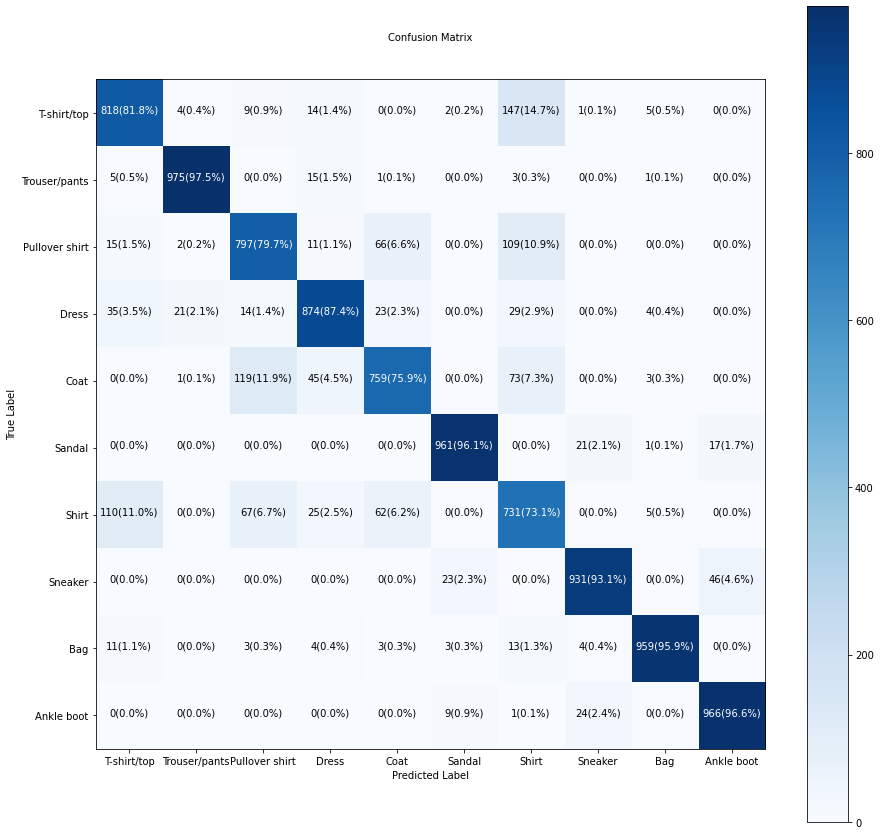

In [6]:
make_confusion_matrix(test_labels, y_preds, figsize=(15,15), classes=class_names, text_size=10)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

### Exercise 5
Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [ ]:
z = tf.range(-10, 10.5, 0.5)
z

<tf.Tensor: shape=(41,), dtype=float32, numpy=
array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ], dtype=float32)>

In [ ]:
def softmax(x):
  return tf.exp(x)/(tf.reduce_sum(tf.exp(x)))

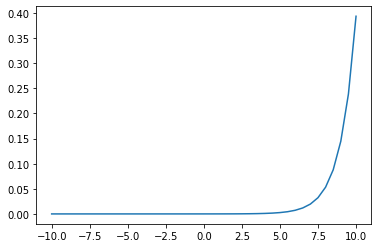

In [ ]:
plt.plot(z, softmax(z))

### Exercise 6
Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediction labels at the same time. Hint: [see the classifcation tutorial in the TensorFlow](https://www.tensorflow.org/tutorials/keras/classification) documentation for ideas.

In [7]:
from random import randint

In [108]:
def plot_image(predictions_array_prob, true_labels, imgs):
  """
    Plot three random images with their corresponding label

    Args:
      prediction_array_prob (np.array) = Array with the probabilities predicted by the model
      true_labels (np.array) = Array with the correct label
      img (np.array) = The image of the object

    Returns:
      A figure with three subplots for ecah object 
  """
  listInteger = np.random.randint(0, true_labels.shape[0], size=3)
  fig, ax = plt.subplots(1,3, figsize=(20,20))
  for i in listInteger:
    index = np.where(listInteger == i)
    index = index[0][0]
    y_prediction = predictions_array_prob.argmax(axis=1)
    true_label, img = true_labels[i], imgs[i]
    ax[index].imshow(img, cmap=plt.cm.binary)

    if y_prediction[i] == test_labels[i]:
      color = 'blue'
    else:
      color = 'red'
  
    ax[index].set_xlabel("{} {:2.0f}% ({})".format(class_names[y_prediction[i]],
                                       100*np.max(predictions_array_prob[i]),
                                       class_names[true_label]),
                                       color = color)
  plt.setp(ax, xticks=[], yticks=[])

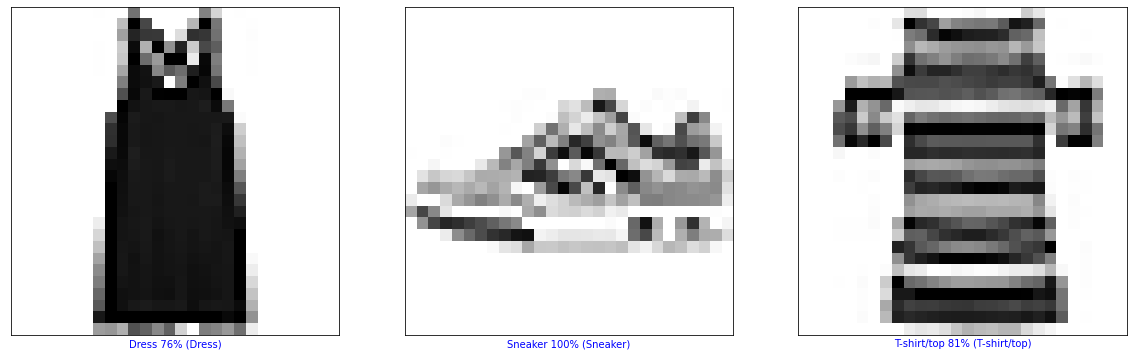

In [110]:
plot_image(y_probs, test_labels, test_data)

### Exercise 7
Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the T-shirt class with their predictions.

In [160]:
def plot_image_same_class(predictions_array_prob, true_labels, imgs, class_m):
  """
  Plot three random images from the same class with their corresponding label, 

  Args:
    prediction_array_prob (np.array) = Array with the probabilities predicted by the model
    true_labels (np.array) = Array with the correct label
    img (np.array) = The image of the object
    class_m (int) = the label number [0 - 9]

  Returns:
    A figure with three subplots for ecah object 
  """
  new_list = np.where(true_labels==class_m)
  listInteger = np.random.randint(0, new_list[0].shape[0], size=3)
  fig, ax = plt.subplots(1,3, figsize=(20,20))
  for i in listInteger:
    index = np.where(listInteger == i)
    index = index[0][0]
    new_i = new_list[0][i]
    y_prediction = predictions_array_prob.argmax(axis=1)
    true_label, img = true_labels[new_i], imgs[new_i]
    ax[index].imshow(img, cmap=plt.cm.binary)

    if y_prediction[new_i] == test_labels[new_i]:
      color = 'blue'
    else:
      color = 'red'

    ax[index].set_xlabel("{} {:2.0f}% ({})".format(class_names[y_prediction[new_i]],
                                        100*np.max(y_probs[new_i]),
                                        class_names[true_label]),
                                        color = color)
  plt.setp(ax, xticks=[], yticks=[])

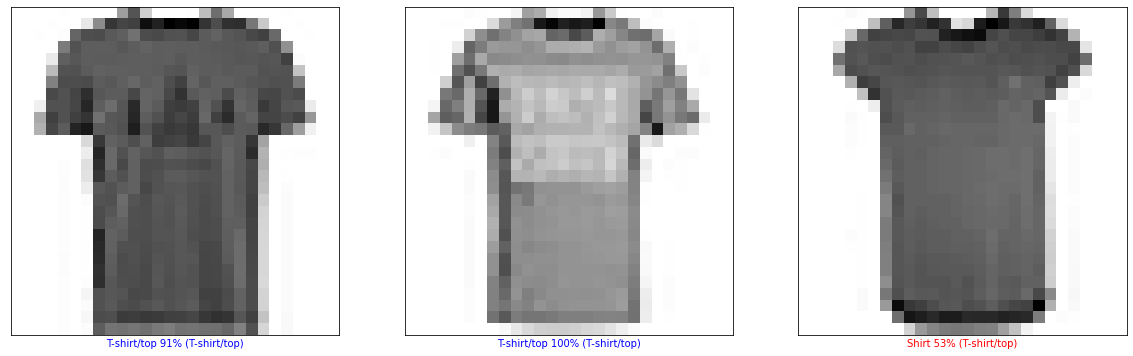

In [164]:
plot_image_same_class(y_probs, test_labels, test_data, 0)